## UTKARSH TRIPATHI

# Task 02 - Explore Supervised Machine Learning

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Read the dataset**
   
### [3. Exploratory Analysis](#explore)

### [4. Model Architecture](#cnn)
   * **Split the dataset**
   * **Train model**

### [5. Model Evaluation](#eval)
   * **Evaluation Metrics**
   * **Observations**

### [6. Prediction](#predict)  

<a id="intro"></a>
### 1. Introduction

#### About the task
In this regression task, we will try to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Problem statement
What will be predicted score if a student studies for **9.25** hrs in a day?

#### Dataset link: http://bit.ly/w-data

<a id="data"></a>
### 2. Data Preparation

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries used for generating plots.
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Machine learning models library used for classification
from sklearn.linear_model import LinearRegression

# For splitting the dataset.
from sklearn.model_selection import train_test_split, cross_val_score

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

#### Read the dataset

In [2]:
# Read the dataset and view the top 5 rows.
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<a id="explore"></a>
### 3. Exploratory Analysis

In [3]:
# Get the shape of dataset.
df.shape

(25, 2)

The dataset contains 25 rows and 2 columns.

In [4]:
# Get dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
# Identify columns with null values.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

None of the columns contain null values.

In [6]:
# Describe the dataset by basic statistical calculations.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Generate a quick summary containing count, mean, standard deviation, minimum, maximum and quartile ranges for the dataset.

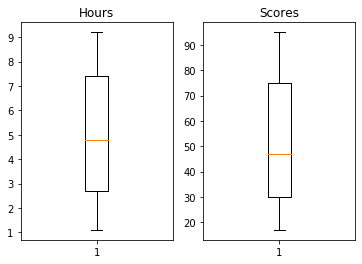

In [7]:
# Generate a box plot to identify outliers.
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(df["Hours"])
ax1.set_title("Hours")

ax2.boxplot(df["Scores"])
ax2.set_title("Scores")

plt.show()

The dataset has no outliers.

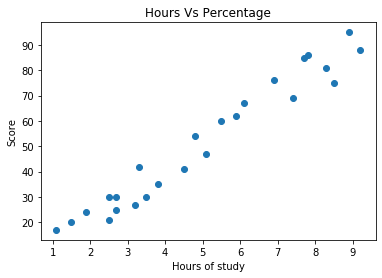

In [8]:
# Generate a scatter plot.
plt.scatter(df["Hours"],df["Scores"])

plt.xlabel("Hours of study")
plt.ylabel("Score")
plt.title("Hours Vs Percentage")

plt.show()

There is a visible correlation between hours and score.

<a id="cnn"></a>
### 4. Model Architecture

#### Split the dataset

In [9]:
# Prepare the X and Y variables.
X = df.drop("Scores",axis=1)
Y = df["Scores"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Train model

In [10]:
# Train a Linear Regression model.
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<a id="eval"></a>
### 5. Model Evaluation

#### Evaluation Metrics

In [11]:
y_pred = LinearRegressor.predict(X_test)

print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-2:", r2_score(y_test, y_pred))
print("\n")
print("Training Accuracy: {} %".format(LinearRegressor.score(X_train,y_train)*100))
print("Test Accuracy: {} %".format(LinearRegressor.score(X_test,y_test)*100))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


Training Accuracy: 95.15510725211553 %
Test Accuracy: 94.54906892105353 %


#### Observations:
Accuracy of the model on unseen data is 94.5 %.

The closer the value of Mean Absolute Error is to 0, the better.

The closer the value of Mean Squared Error is to 0, the better.

The closer the value of Root Mean Squared Error is to 0, the better is the model.

The closer the value of R2 is to 1, the better is the model.

<a id="predict"></a>
### 6. Prediction

In [12]:
# What will be the predicted score if a student studies for 9.25 hours?
hours = np.array(9.25)
predictions = LinearRegressor.predict(hours.reshape(1,-1))

# Since the score is an integer type element, we will round off the score to the closest integer.
print("The predicted score if a student studies for 9.25 hours a day = {}".format(int(round(predictions[0]))))

The predicted score if a student studies for 9.25 hours a day = 94
